# Make a simple Convolutional network for the bus data

## Initialization

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../misc')
sys.path.append("../")
from MoviaBusDataset import MoviaBusDataset
from BaseNetwork import BaseNetwork
import torch
from torch.nn import Linear, Sequential, ReLU, L1Loss
from torch.optim import Adam, lr_scheduler
import numpy as np

## Import data using the MoviaBusDataset

In [16]:
previous_timesteps = 6
prediction_steps = 6
batch_size = 25


train = MoviaBusDataset('../data/train', interpolation=True, 
                        prev_timesteps=previous_timesteps, 
                        max_future_time_steps=prediction_steps)
validation = MoviaBusDataset('../data/validation', interpolation=True, 
                       prev_timesteps=previous_timesteps, 
                       max_future_time_steps=prediction_steps)

In [3]:
train.remove_trend()
validation.remove_trend(train._historical_average)

## The Model

In [115]:
#from IPython.core.debugger import Tracer; Tracer()()
#%pdb 0

from CNN_2 import CNN as CNN_2 #, GCN
from CNN import CNN 
from FNN import FNN
cnn = CNN_2(previous_timesteps)

#cnn = GCN(nfeat=previous_timesteps + 1, 
#          nhid=100, 
#          nout=1, 
#          dropout=0.3)



../DCRNN/lib/utils.py:104: RuntimeWarning: divide by zero encountered in power
  d_inv = np.power(d, -1).flatten()


## Training the network

In [116]:
#%pdb 0
cnn.train_network(train, validation,batch_size=batch_size, 
                  num_epochs=30,
                  optimizer_fun=lambda param : Adam(param, lr=1e-2, weight_decay=1e-4),
                  scheduler_fun=lambda optim : lr_scheduler.StepLR(optim, step_size=10, gamma=0.1),
                  criterion=L1Loss())

epoch =  0  train loss = 3.708   validation loss = 2.803   output_std = 0.773
Model saved as CNN.pt
epoch =  2  train loss = 2.282   validation loss = 2.214   output_std = 2.144
Model saved as CNN.pt
epoch =  4  train loss = 1.762   validation loss = 1.723   output_std = 2.709
Model saved as CNN.pt
epoch =  6  train loss = 1.611   validation loss = 1.622   output_std = 2.768
Model saved as CNN.pt
epoch =  8  train loss = 1.586   validation loss = 1.619   output_std = 2.826
Model saved as CNN.pt
epoch = 10  train loss = 1.580   validation loss = 1.618   output_std = 2.844
Model saved as CNN.pt
epoch = 12  train loss = 1.541   validation loss = 1.616   output_std = 2.822
Model saved as CNN.pt
epoch = 14  train loss = 1.539   validation loss = 1.619   output_std = 2.816
epoch = 16  train loss = 1.538   validation loss = 1.620   output_std = 2.818
epoch = 18  train loss = 1.538   validation loss = 1.620   output_std = 2.822
epoch = 20  train loss = 1.538   validation loss = 1.620   output_

In [80]:
fnn = FNN(num_hidden=20,previous_timesteps=previous_timesteps)

optimizer_fun = lambda param : Adam(param, lr=1e-2, weight_decay=0)
scheduler_fun = lambda optim : lr_scheduler.StepLR(optim, step_size=25, gamma=0.1)
criterion = L1Loss()
fnn.train_network(train, validation,batch_size=batch_size, 
                  num_epochs=100,
                  optimizer_fun=optimizer_fun,
                  scheduler_fun=scheduler_fun,
                  criterion=criterion)

epoch =  0  train loss = 2.104   validation loss = 1.673   output_std = 2.845
Model saved as FNN.pt
epoch =  2  train loss = 1.602   validation loss = 1.634   output_std = 2.968
Model saved as FNN.pt


KeyboardInterrupt: 

In [117]:
a = torch.Tensor(2,4)
print(a.shape)
a = a.unsqueeze(1)
print(a.shape)

torch.Size([2, 4])
torch.Size([2, 1, 4])


## Evaluate the network on a test dataset 

In [118]:
mae_roads = cnn.get_MAE_score(validation,timestep=2,individual_roads=True)

In [111]:
mae_roads_sorted_keys = sorted(range(len(mae_roads)), key=lambda k: mae_roads[k])
print(mae_roads[mae_roads_sorted_keys[0]])
print(mae_roads[mae_roads_sorted_keys[-1]])


0.5630588531494141
5.121297836303711


In [112]:
mae_roads_sorted_keys[-1]

90

In [113]:
mae_roads[mae_roads_sorted_keys]

array([0.56305885, 0.62118042, 0.66015327, 0.68350732, 0.68624878,
       0.71873319, 0.78230071, 0.80782634, 0.81499004, 0.82854819,
       0.8381049 , 0.87907767, 0.88752747, 0.89303154, 0.91324341,
       0.92650437, 0.93247277, 0.95009571, 0.95243639, 0.95528358,
       0.95838207, 0.95886451, 0.96180999, 0.98383987, 0.98514438,
       0.9887687 , 0.9950794 , 1.00945985, 1.01212943, 1.02657068,
       1.04148924, 1.0546658 , 1.05838263, 1.06338906, 1.07047594,
       1.07918358, 1.07971859, 1.09548414, 1.11112463, 1.12258327,
       1.12864661, 1.13484359, 1.13835418, 1.14418721, 1.15942621,
       1.1607306 , 1.16076553, 1.16759706, 1.17299294, 1.17625594,
       1.18257713, 1.18845665, 1.19246161, 1.19520724, 1.19961274,
       1.20888674, 1.22018397, 1.22392547, 1.2263335 , 1.23393774,
       1.23451602, 1.23749149, 1.24562728, 1.25015092, 1.25313151,
       1.2559638 , 1.28885412, 1.29258788, 1.29699886, 1.29798567,
       1.29980195, 1.33252835, 1.33508408, 1.33537221, 1.33648

### Modelled data vs real data for best road segment 

<IPython.core.display.Javascript object>


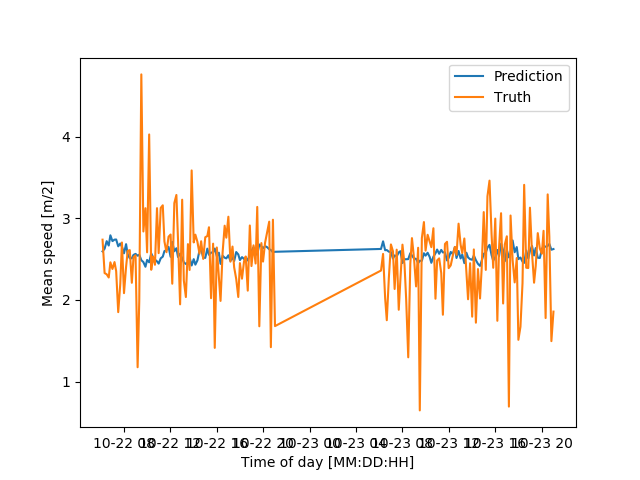

In [119]:
%matplotlib notebook

cnn.visualize_road(dataset=validation,timesteps=1, road=mae_roads_sorted_keys[0])

### Modelled data vs real data for worst road segment 

In [ ]:
%matplotlib notebook

fnn.visualize_road(validation,timesteps=1, road=mae_roads_sorted_keys[0])

In [ ]:
8*3.6